In [57]:
import yfinance
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
ativo = 'IBM'
df = yfinance.download(ativo, start='2004-01-01', end='2025-09-25')['Close']
display(df)

C:\Users\souza\AppData\Local\Temp\ipykernel_20584\1118176402.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yfinance.download(ativo, start='2004-01-01', end='2025-09-25')['Close']
[*********************100%***********************]  1 of 1 completed


Ticker,IBM
Date,
2004-01-02,46.690498
2004-01-05,47.455502
2004-01-06,47.460613
2004-01-07,47.317814
2004-01-08,47.450405
...,...
2025-09-18,265.000000
2025-09-19,266.399994
2025-09-22,271.369995


In [59]:
# transformada de fourier
def transformada_fourier(sinal, fs, limiar_frac=0.1):
    # validação do input
    if hasattr(sinal, 'values'):  
        sinal = sinal.values
    sinal = np.ravel(sinal)  

    N = len(sinal)
    x = np.arange(N)/fs  # eixo de tempo

    # --- FFT ---
    y = np.fft.fft(sinal)
    freq = np.fft.fftfreq(N, d=1/fs)

    # --- FFT inversa ---
    inv_y = np.fft.ifft(y)

    # --- grafico sinal original ---
    plt.figure(figsize=(10,4))
    plt.plot(x, sinal)
    plt.title('Sinal original')
    plt.xlabel('Tempo [s]')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

    # --- grafico FFT (módulo) ---
    plt.figure(figsize=(10,4))
    plt.plot(freq[:N//2], np.abs(y[:N//2]))
    plt.title('FFT do sinal')
    plt.xlabel('Frequência [tempo]')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()

    # --- gráfico FFT inversa ---
    plt.figure(figsize=(10,4))
    plt.plot(x, inv_y.real, color='red')
    plt.title('FFT inversa (reconstrução do sinal)')
    plt.xlabel('Tempo [s]')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

    # --- grafico picos mais significativos ---
    magnitude = np.abs(y[:N//2])
    limiar = limiar_frac * np.max(magnitude)
    freq_signif = freq[:N//2][magnitude > limiar]
    mag_signif = magnitude[magnitude > limiar]

    plt.figure(figsize=(10,4))
    plt.stem(freq_signif, mag_signif)
    plt.title(f'Frequências mais significativas (> {limiar_frac*100:.0f}% do máximo)')
    plt.xlabel('Frequência [tempo]')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()


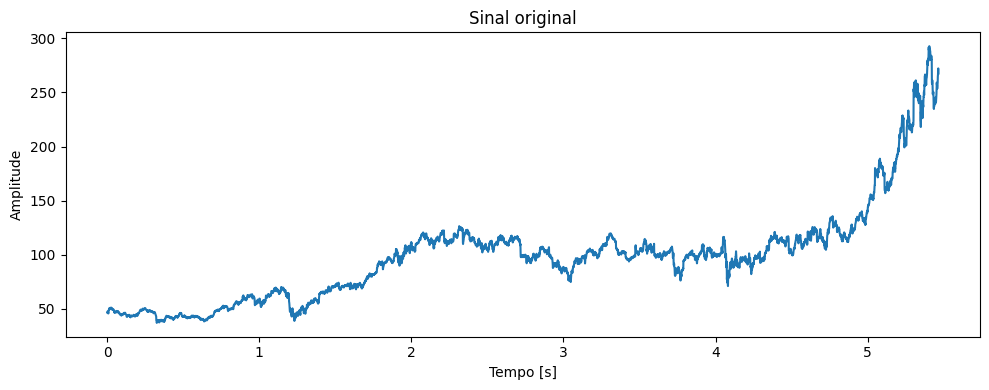

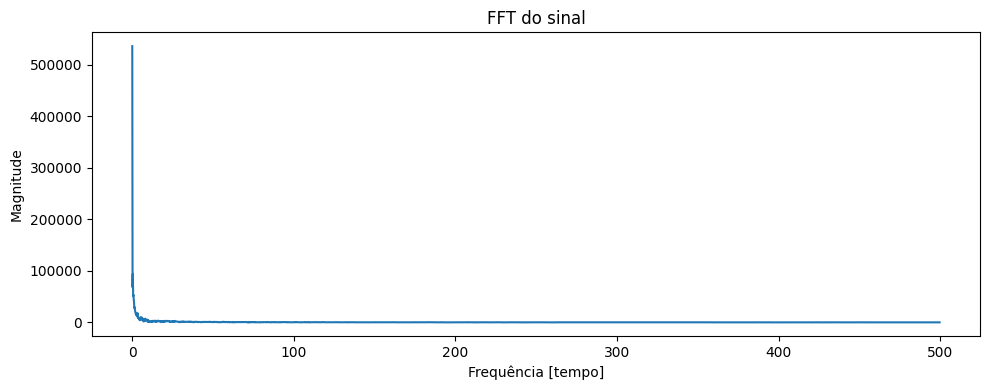

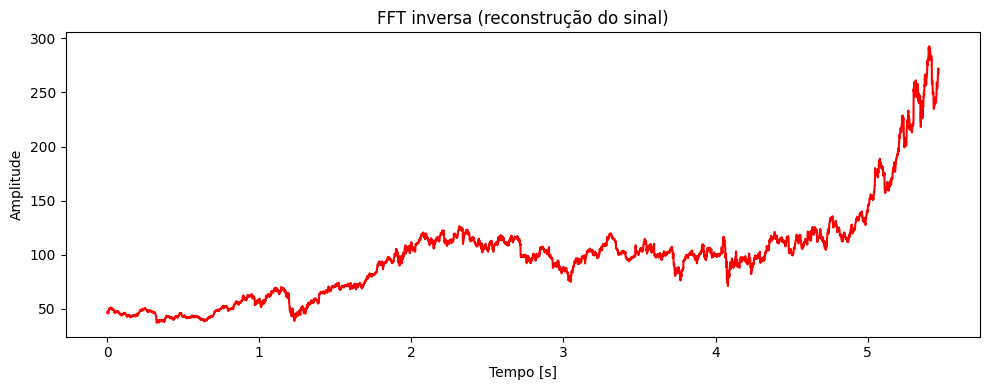

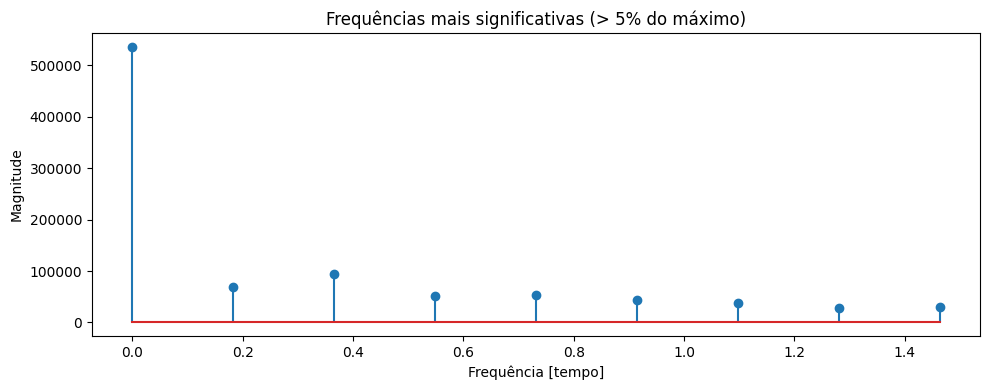

In [60]:
# aplicando funcao
transformada_fourier(df, fs=1000, limiar_frac=0.05)
